Importing the Dependencies


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix




Loading the MNIST data from keras.datasets

In [ ]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images


Test data = 10,000 Images

---



Image dimension => 28*28

GrayScale Image => 1 channel

In [ ]:
 #Printing the 10th Image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
 print(X_train[10].shape)

(28, 28)


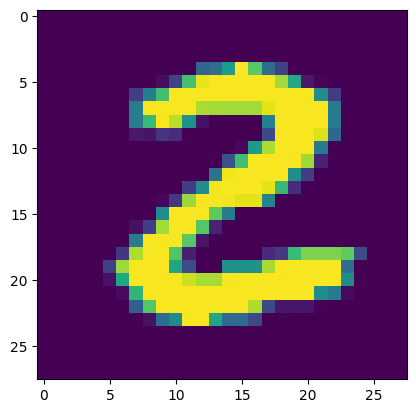

2


In [ ]:
#displaying the image

plt.imshow(X_train[25])
plt.show()

#Print the corresponding label
print(Y_train[25])

In [ ]:
#IMAGE LABELS

print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [ ]:
#Unique values in Y_train & Y_test

print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can alos apply One hOt Encoding

All the images hace the same dimensions in this dataset,if not,we have to resize all the images into a common dimensions

In [ ]:
#scaling the values
#Values are between 0 to 255 = 0,1
#BECAUSE 0/255 = 0, 255/255 = 1

X_train = X_train/255
X_test = X_test/255

In [ ]:
#Printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building a Neural Network

In [ ]:
#setting up the layers of the newural networks

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50,activation = 'relu'),
                          keras.layers.Dense(50,activation = 'relu'),
                          keras.layers.Dense(10,activation = 'sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Compiling the Neural Network

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Training the Neural Network

model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8502 - loss: 0.5081
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9549 - loss: 0.1512
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9673 - loss: 0.1082
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9741 - loss: 0.0848
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9787 - loss: 0.0687
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9830 - loss: 0.0567
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9851 - loss: 0.0480
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9880 - loss: 0.0407
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9888 - loss: 0.0371
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9906 - loss: 0.0299


**Training data accuracy = 99.06%**

Accuracy on Test Data

In [ ]:
loss,accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9637 - loss: 0.1477
0.9675999879837036


**Test data accuracy = 96.75%**

In [ ]:
print(X_test.shape)

(10000, 28, 28)


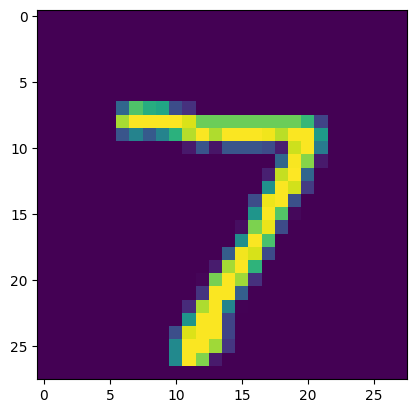

In [ ]:
#first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred  = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])

[3.8076180e-03 1.2408460e-02 9.6612966e-01 9.9967551e-01 3.2242949e-07
 3.8165541e-04 2.8437921e-13 9.9999976e-01 8.9973714e-03 9.1692072e-01]


model.predict(0 gievs the prediction of each class for that data point

In [ ]:
#Converting the prediction probabilities to class label

label_for_first_test_imag = np.argmax(Y_pred[0])
print(label_for_first_test_imag)

7


In [ ]:
#Converting the prediction probabilities to class label for all test data points

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 4, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 0, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
print(Y_pred)

[[3.8076180e-03 1.2408460e-02 9.6612966e-01 ... 9.9999976e-01
  8.9973714e-03 9.1692072e-01]
 [1.1872785e-02 1.7532252e-02 9.9999356e-01 ... 3.5670507e-09
  3.5136896e-01 1.4862136e-04]
 [1.0815714e-05 9.9910349e-01 2.4809465e-01 ... 4.8849967e-01
  3.8810444e-01 3.0391755e-06]
 ...
 [9.4744195e-09 1.9597688e-05 1.9531935e-06 ... 1.8074250e-01
  1.5243059e-01 4.0997353e-01]
 [7.1147902e-06 3.0989531e-07 1.3004210e-06 ... 6.4244326e-05
  9.9017334e-01 7.9054247e-05]
 [3.3818989e-04 1.7176911e-08 6.0758914e-08 ... 2.2703055e-10
  1.6929238e-04 1.7922886e-07]]


Y_test => True Labels

Y_pred_labels => Predictes Labels

Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(Y_test,Y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 960    0    2    1    2    2    6    2    0    5]
 [   0 1111    2    1    2    0    7    2   10    0]
 [   6    0  997    7    6    1    4    6    5    0]
 [   0    0    5  986    0    4    0    7    1    7]
 [   0    0    1    0  959    0   10    3    6    3]
 [   1    0    0   28    2  847    9    0    4    1]
 [   3    2    1    1    3    6  940    1    1    0]
 [   1    0    8    3    2    0    0 1003    3    8]
 [   4    0    5   19    4    6    7    2  924    3]
 [   2    2    1    5   33    4    1    7    5  949]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

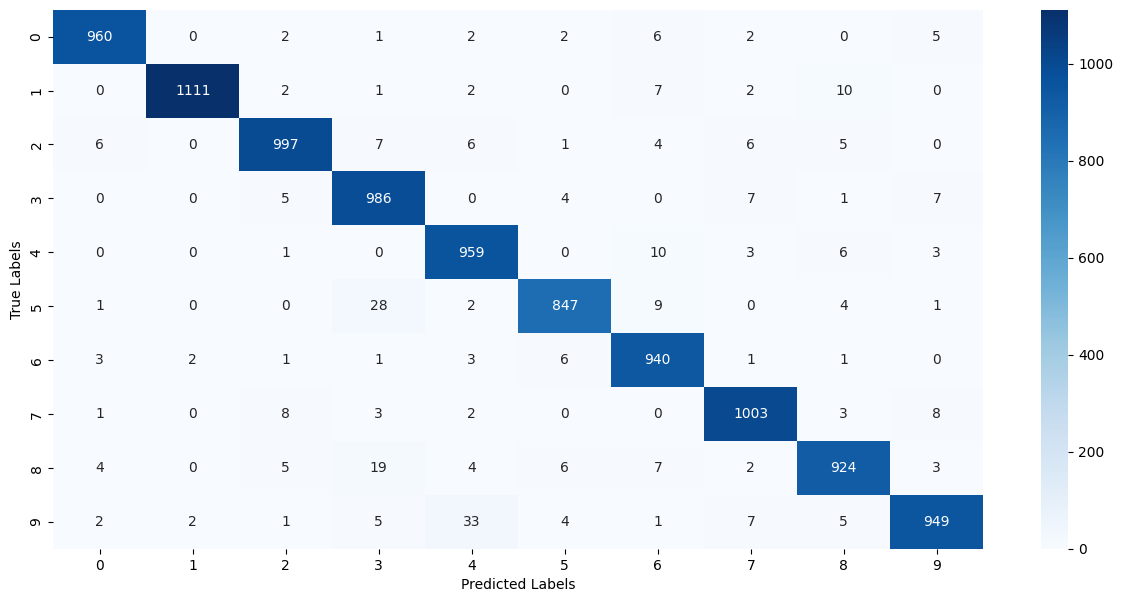

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building the Predicitve System

In [ ]:
input_image_path =('/content/MNIST_digit.png')
input_image = cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


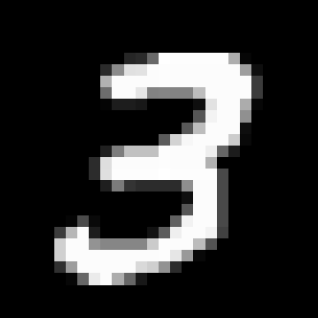

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(318, 318, 3)

In [ ]:
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape


(318, 318)

In [ ]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize = input_image_resize/255

In [ ]:
type(input_image_resize)

numpy.ndarray

In [ ]:
image_reshaped = np.reshape(input_image_resize,[1,28,28])

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
[[2.0612691e-07 2.3002018e-01 2.4926633e-02 1.0000000e+00 2.0635971e-12
  6.2499009e-04 6.0407721e-20 1.5331835e-03 6.7575938e-01 9.7104394e-01]]


In [ ]:
input_pred_label = np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

3


**Predictve System**

Path of the image to be predicted: /content/MNIST_digit.png


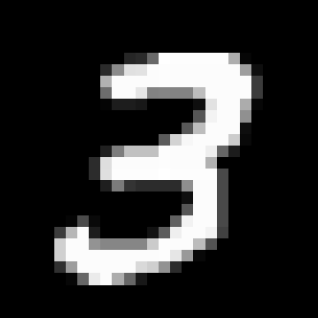

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
The Handwritten Digit is recognised as 3


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale,(28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize,[1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as',input_pred_label)




